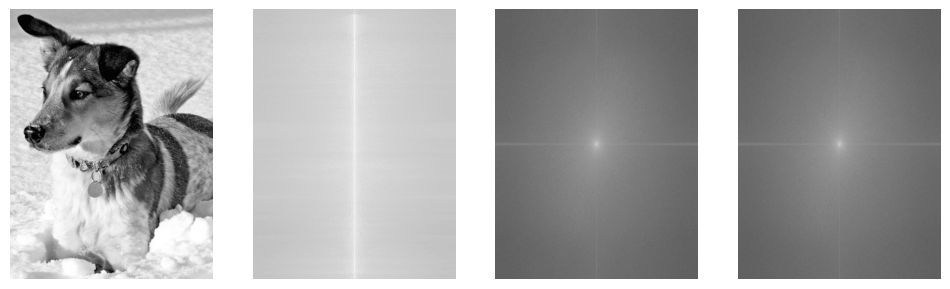

In [7]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('..','DATA','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

fig,axs = plt.subplots(1,4)

# Plot image
img = axs[0].imshow(B)
img.set_cmap('gray')
axs[0].axis('off')

# Compute row-wise FFT

Cshift = np.zeros_like(B,dtype='complex_')
C = np.zeros_like(B,dtype='complex_')

for j in range(B.shape[0]):
    Cshift[j,:] = np.fft.fftshift(np.fft.fft(B[j,:]))
    C[j,:] = np.fft.fft(B[j,:])
    
img = axs[1].imshow(np.log(np.abs(Cshift)))
img.set_cmap('gray')
axs[1].axis('off')

# Compute column-wise FFT

D = np.zeros_like(C)
for j in range(C.shape[1]):
    D[:,j] = np.fft.fft(C[:,j])

img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

# Much more efficient to use fft2
E = np.fft.fft2(B)

img = axs[3].imshow(np.fft.fftshift(np.log(np.abs(E))))
img.set_cmap('gray')
axs[3].axis('off')

plt.show()



In [5]:
A.shape, B.shape

((2000, 1500, 3), (2000, 1500))

Signature: axs[0].axis(arg=None, /, *, emit=True, **kwargs)
Docstring:
Convenience method to get or set some axis properties.

Call signatures::

  xmin, xmax, ymin, ymax = axis()
  xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
  xmin, xmax, ymin, ymax = axis(option)
  xmin, xmax, ymin, ymax = axis(**kwargs)

Parameters
----------
xmin, xmax, ymin, ymax : float, optional
    The axis limits to be set.  This can also be achieved using ::

        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

option : bool or str
    If a bool, turns axis lines and labels on or off. If a string,
    possible values are:

    ================ ===========================================================
    Value            Description
    ================ ===========================================================
    'off' or `False` Hide all axis decorations, i.e. axis labels, spines,
                     tick marks, tick labels, and grid lines.
                     This is the same as `~.Axes.